This example shows a capacitive power supply with a pre zener
half-rectification.


In [ ]:


import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)




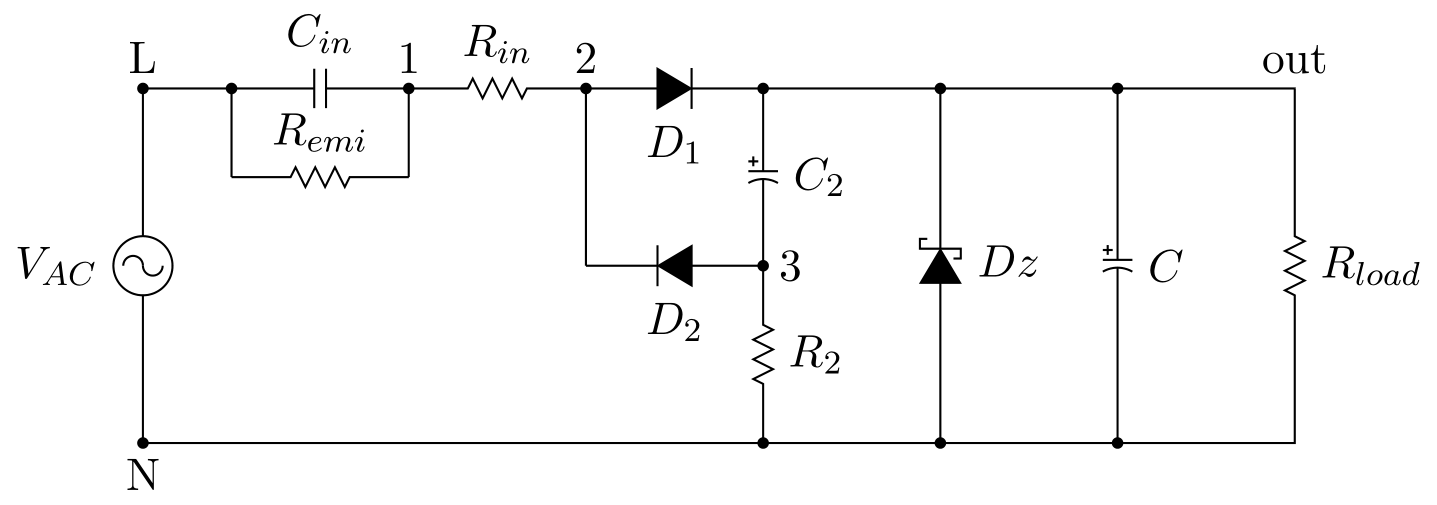

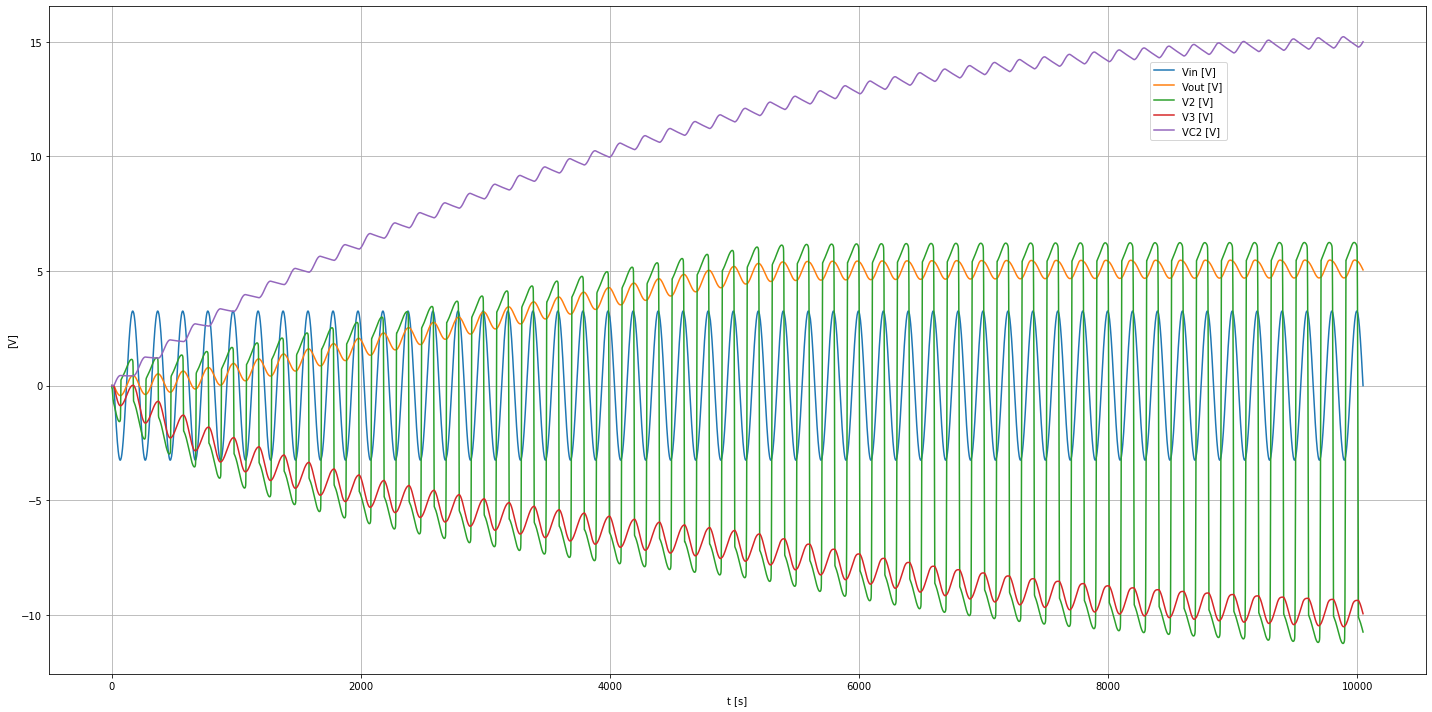

In [ ]:

circuit = Circuit('Capacitive Half-Wave Rectification (Pre Zener)')

circuit.include(spice_library['1N4148'])
# 1N5919B: 5.6 V, 3.0 W Zener Diode Voltage Regulator
circuit.include(spice_library['d1n5919brl'])

ac_line = circuit.AcLine('input', circuit.gnd, 'L', rms_voltage=230@u_V, frequency=50@u_Hz)
circuit.C('in', 'L', 1, 330@u_nF)
circuit.R('emi', 'L', 1, 165@u_kΩ)
circuit.R('in', 1, 2, 2*47@u_Ω)
circuit.X('D1', '1N4148', 2, 'out')
circuit.C('2', 'out', 3, 250@u_uF)
circuit.R('2', 3, circuit.gnd, 1@u_kΩ)
circuit.X('D2', '1N4148', 3, 2)
circuit.X('Dz', 'd1n5919brl', circuit.gnd, 'out')
circuit.C('', circuit.gnd, 'out', 250@u_uF)
circuit.R('load', circuit.gnd, 'out', 1@u_kΩ)

# print circuit.nodes

# Simulator(circuit, ...).transient(...)
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=ac_line.period/200, end_time=ac_line.period*50)

figure, ax = plt.subplots(1, figsize=(20, 10))

ax.plot(analysis.L / 100)
ax.plot(analysis.out)

ax.plot(analysis['2'])
ax.plot(analysis['3'])
ax.plot((analysis.out - analysis['3']))
# ax.plot((analysis['2'] - analysis['3']))

#ax.plot((analysis.L - analysis['1']) / 100)

###ax.plot((analysis.out - analysis['L']) / 100)
###ax.plot(analysis.out - analysis['2'])
###ax.plot((analysis['2'] - analysis['1']) / 100)
# or:
#   plt.ax.plot(analysis.out.abscissa, analysis.out)
ax.legend(('Vin [V]', 'Vout [V]', 'V2 [V]', 'V3 [V]', 'VC2 [V]'), loc=(.8,.8))
ax.grid()
ax.set_xlabel('t [s]')
ax.set_ylabel('[V]')

plt.tight_layout()

